In [7]:
### 🏡 Airbnb Price Prediction & Insights

"""Airbnb provides a platform for property owners to rent their spaces to travelers. One of the most important decisions a host makes is how to price their listing. Setting the right price can help maximize revenue and ensure competitiveness in the market.

This project aims to:
- Build a regression model using **Linear Regression** to predict Airbnb listing prices.
- Analyze factors that influence pricing, such as **room type**, **location**, **number of amenities**, and **host characteristics**.
- Provide **actionable insights** for Airbnb hosts to optimize their listing prices.

By the end of this project, we will have a clear understanding of the key drivers of price and a model that can help predict future listing prices."""


'Airbnb provides a platform for property owners to rent their spaces to travelers. One of the most important decisions a host makes is how to price their listing. Setting the right price can help maximize revenue and ensure competitiveness in the market.\n\nThis project aims to:\n- Build a regression model using **Linear Regression** to predict Airbnb listing prices.\n- Analyze factors that influence pricing, such as **room type**, **location**, **number of amenities**, and **host characteristics**.\n- Provide **actionable insights** for Airbnb hosts to optimize their listing prices.\n\nBy the end of this project, we will have a clear understanding of the key drivers of price and a model that can help predict future listing prices.'

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

import datetime as dt

In [4]:
df = pd.read_excel('Airbnb_data.xlsx')
print("Shape of dataset:", df.shape)
df.head()

Shape of dataset: (74111, 29)


,id,log_price,property_type,room_type,amenities,accommodates,bathrooms,bed_type,cancellation_policy,cleaning_fee,...,latitude,longitude,name,neighbourhood,number_of_reviews,review_scores_rating,thumbnail_url,zipcode,bedrooms,beds
0,6901257,5.010635,Apartment,Entire home/apt,"{""Wireless Internet"",""Air conditioning"",Kitche...",3,1.0,Real Bed,strict,True,...,40.696524,-73.991617,Beautiful brownstone 1-bedroom,Brooklyn Heights,2,100.0,https://a0.muscache.com/im/pictures/6d7cbbf7-c...,11201,1.0,1.0
1,6304928,5.129899,Apartment,Entire home/apt,"{""Wireless Internet"",""Air conditioning"",Kitche...",7,1.0,Real Bed,strict,True,...,40.766115,-73.989040,Superb 3BR Apt Located Near Times Square,Hell's Kitchen,6,93.0,https://a0.muscache.com/im/pictures/348a55fe-4...,10019,3.0,3.0
2,7919400,4.976734,Apartment,Entire home/apt,"{TV,""Cable TV"",""Wireless Internet"",""Air condit...",5,1.0,Real Bed,moderate,True,...,40.808110,-73.943756,The Garden Oasis,Harlem,10,92.0,https://a0.muscache.com/im/pictures/6fae5362-9...,10027,1.0,3.0
3,13418779,6.620073,House,Entire home/apt,"{TV,""Cable TV"",Internet,""Wireless Internet"",Ki...",4,1.0,Real Bed,flexible,True,...,37.772004,-122.431619,Beautiful Flat in the Heart of SF!,Lower Haight,0,NaN,https://a0.muscache.com/im/pictures/72208dad-9...,94117,2.0,2.0
4,3808709,4.744932,Apartment,Entire home/apt,"{TV,Internet,""Wireless Internet"",""Air conditio...",2,1.0,Real Bed,moderate,True,...,38.925627,-77.034596,Great studio in midtown DC,Columbia Heights,4,40.0,NaN,20009,0.0,1.0


In [5]:
# Overview of data types and non-null counts
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 74111 entries, 0 to 74110
Data columns (total 29 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   id                      74111 non-null  int64  
 1   log_price               74111 non-null  float64
 2   property_type           74111 non-null  object 
 3   room_type               74111 non-null  object 
 4   amenities               74111 non-null  object 
 5   accommodates            74111 non-null  int64  
 6   bathrooms               73911 non-null  float64
 7   bed_type                74111 non-null  object 
 8   cancellation_policy     74111 non-null  object 
 9   cleaning_fee            74111 non-null  bool   
 10  city                    74111 non-null  object 
 11  description             74105 non-null  object 
 12  first_review            58247 non-null  object 
 13  host_has_profile_pic    73923 non-null  object 
 14  host_identity_verified  73923 non-null

In [8]:
# Basic statistical summary of numeric columns
df.describe()

,id,log_price,accommodates,bathrooms,host_response_rate,latitude,longitude,number_of_reviews,review_scores_rating,bedrooms,beds
count,7.411100e+04,74111.000000,74111.000000,73911.000000,55812.000000,74111.000000,74111.000000,74111.000000,57389.000000,74020.000000,73980.000000
mean,1.126662e+07,4.782069,3.155146,1.235263,0.943520,38.445958,-92.397525,20.900568,94.067365,1.265793,1.710868
std,6.081735e+06,0.717394,2.153589,0.582044,0.163418,3.080167,21.705322,37.828641,7.836556,0.852143,1.254142
min,3.440000e+02,0.000000,1.000000,0.000000,0.000000,33.338905,-122.511500,0.000000,20.000000,0.000000,0.000000
25%,6.261964e+06,4.317488,2.000000,1.000000,1.000000,34.127908,-118.342374,1.000000,92.000000,1.000000,1.000000
50%,1.225415e+07,4.709530,2.000000,1.000000,1.000000,40.662138,-76.996965,6.000000,96.000000,1.000000,1.000000
75%,1.640226e+07,5.220356,4.000000,1.000000,1.000000,40.746096,-73.954660,23.000000,100.000000,1.000000,2.000000
max,2.123090e+07,7.600402,16.000000,8.000000,1.000000,42.390437,-70.985047,605.000000,100.000000,10.000000,18.000000


In [9]:
# Count of missing values in each column
missing = df.isnull().sum().sort_values(ascending=False)
missing[missing > 0]  # Display only columns with missing values

host_response_rate        18299
review_scores_rating      16722
first_review              15864
last_review               15827
thumbnail_url              8216
neighbourhood              6872
zipcode                     968
bathrooms                   200
host_identity_verified      188
host_since                  188
host_has_profile_pic        188
beds                        131
bedrooms                     91
name                         10
description                   6
dtype: int64

In [13]:
# Fill numeric columns with median
for col in ['bathrooms', 'bedrooms', 'beds', 'review_scores_rating', 'host_response_rate']:
    df[col] = df[col].fillna(df[col].median())

# Fill categorical columns with mode
for col in ['property_type', 'room_type', 'bed_type', 'cancellation_policy', 'city', 'neighbourhood']:
    df[col] = df[col].fillna(df[col].mode()[0])


In [15]:
# Convert 't'/'f' strings to 1.0/0.0
for col in ['host_has_profile_pic', 'host_identity_verified', 'instant_bookable', 'cleaning_fee']:
    df[col] = df[col].map({'t': 1.0, 'f': 0.0, True: 1.0, False: 0.0})


In [16]:
# Drop Unnecessary Columns
df.drop(columns=[
    'id', 'name', 'description', 'thumbnail_url', 'first_review',
    'last_review', 'host_since', 'zipcode', 'amenities'
], inplace=True)


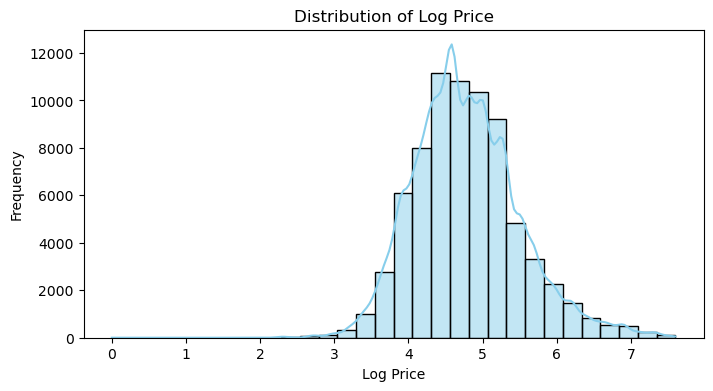

In [17]:
#Visual Exploratory Data Analysis (EDA)

plt.figure(figsize=(8, 4))
sns.histplot(df['log_price'], bins=30, kde=True, color='skyblue')
plt.title('Distribution of Log Price')
plt.xlabel('Log Price')
plt.ylabel('Frequency')
plt.show()


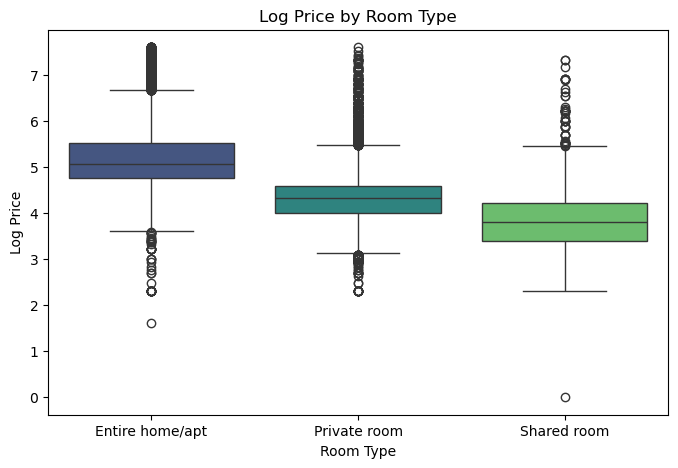

In [19]:
#Boxplot: Room Type vs Log Price

plt.figure(figsize=(8, 5))
sns.boxplot(data=df, x='room_type', y='log_price', hue='room_type', palette='viridis', legend=False)
plt.title('Log Price by Room Type')
plt.xlabel('Room Type')
plt.ylabel('Log Price')
plt.show()

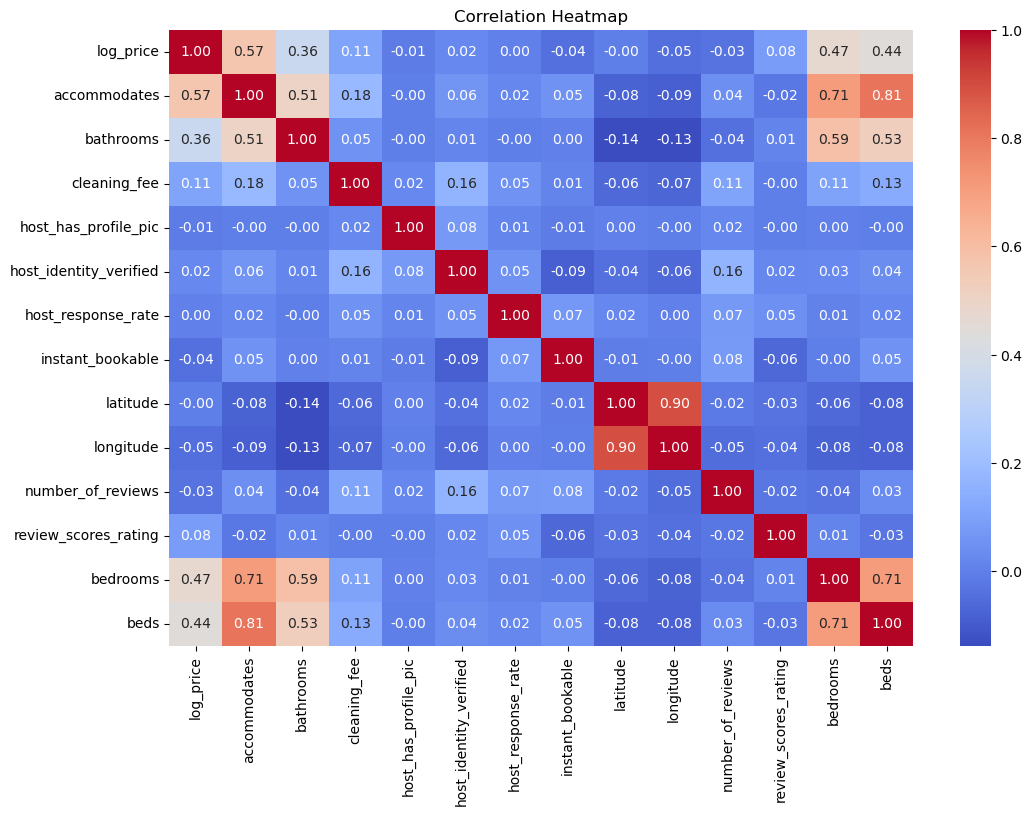

In [20]:
#Correlation Heatmap (Numerical Features)

plt.figure(figsize=(12, 8))
sns.heatmap(df.corr(numeric_only=True), annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Heatmap')
plt.show()

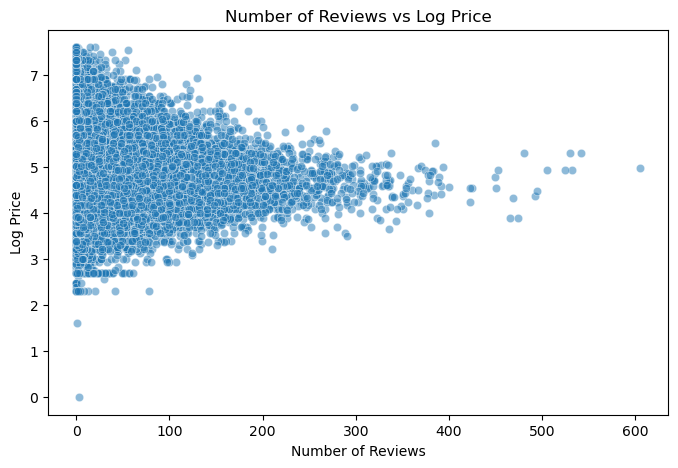

In [21]:
#Scatterplot: Number of Reviews vs Log Price

plt.figure(figsize=(8, 5))
sns.scatterplot(x='number_of_reviews', y='log_price', data=df, alpha=0.5)
plt.title('Number of Reviews vs Log Price')
plt.xlabel('Number of Reviews')
plt.ylabel('Log Price')
plt.show()


In [22]:
# removing outliers using IQR
# Calculate Q1 and Q3
Q1 = df['log_price'].quantile(0.25)
Q3 = df['log_price'].quantile(0.75)
IQR = Q3 - Q1

# Define bounds
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Filter the DataFrame
df = df[(df['log_price'] >= lower_bound) & (df['log_price'] <= upper_bound)]

# Confirm the shape after removing outliers
print("Shape after removing outliers:", df.shape)


Shape after removing outliers: (72579, 20)


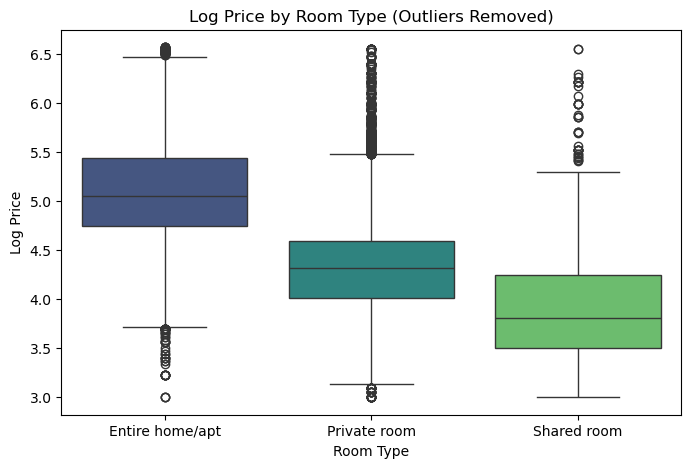

In [24]:
plt.figure(figsize=(8, 5))
sns.boxplot(data=df, x='room_type', y='log_price', hue='room_type', palette='viridis', legend=False)
plt.title('Log Price by Room Type (Outliers Removed)')
plt.xlabel('Room Type')
plt.ylabel('Log Price')
plt.show()


In [25]:
# Label Encode Categorical Variables

from sklearn.preprocessing import LabelEncoder

# List of categorical columns to label encode
cat_cols = ['property_type', 'room_type', 'bed_type', 'cancellation_policy', 'city']

# Create encoder and apply to each column
le = LabelEncoder()
for col in cat_cols:
    df[col] = le.fit_transform(df[col])

print("Shape after label encoding:", df.shape)
df[cat_cols].head()


Shape after label encoding: (72579, 20)


,property_type,room_type,bed_type,cancellation_policy,city
0,0,0,4,2,4
1,0,0,4,2,4
2,0,0,4,1,4
4,0,0,4,1,2
5,0,1,4,2,5


In [33]:
from sklearn.preprocessing import LabelEncoder

# List of all string-based categorical columns
cat_cols = ['property_type', 'room_type', 'bed_type', 'cancellation_policy', 'city', 'neighbourhood']

# Apply Label Encoding to each of them
le = LabelEncoder()
for col in cat_cols:
    if df[col].dtype == 'object':
        df[col] = le.fit_transform(df[col])


In [37]:
for col in ['host_has_profile_pic', 'host_identity_verified']:
    df[col] = df[col].fillna(df[col].mode()[0])


In [39]:
#Split the Data (Training and  Testing)

from sklearn.model_selection import train_test_split

# Separate features and target
X = df.drop('log_price', axis=1)
y = df['log_price']

# Split: 75% train, 25% test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

print(f"Training set shape: {X_train.shape}")
print(f"Test set shape: {X_test.shape}")



Training set shape: (54434, 19)
Test set shape: (18145, 19)


In [40]:
model = LinearRegression()
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

In [42]:
# Calculate evaluation metrics
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

# Print results
print("Model Performance on Test Set:")
print(f" RMSE: {rmse:.3f}")
print(f" MAE : {mae:.3f}")
print(f" R²   : {r2:.3f}")

Model Performance on Test Set:
 RMSE: 0.451
 MAE : 0.349
 R²   : 0.525


In [43]:
##Insights About Factors Influencing Airbnb Prices
"""Based on the linear regression model and feature importance analysis:
Room Type: Listings offering entire homes/apartments are priced significantly higher than private or shared rooms.
Number of Accommodates, Bedrooms, and Beds: Higher capacity listings tend to have higher prices.
Location Factors: Neighborhood, city, and latitude/longitude influence pricing due to local demand and tourism density.

Host Features: Hosts with profile pictures and verified identities often have slightly higher-priced listings, indicating trust and credibility.

Cleaning Fee: Listings that charge a cleaning fee are typically priced higher, likely reflecting more premium service.
Property Type & Bed Type: Different property types (e.g., lofts, houses) and bed types (e.g., real beds vs. futons) have varying impacts on price.
These insights can help Airbnb hosts make data-driven decisions to:
Adjust pricing based on room and property type
Enhance listings with better photos and verified profiles
Understand how local demand and amenities impact profitability"""



'Based on the linear regression model and feature importance analysis:\nRoom Type: Listings offering entire homes/apartments are priced significantly higher than private or shared rooms.\nNumber of Accommodates, Bedrooms, and Beds: Higher capacity listings tend to have higher prices.\nLocation Factors: Neighborhood, city, and latitude/longitude influence pricing due to local demand and tourism density.\n\nHost Features: Hosts with profile pictures and verified identities often have slightly higher-priced listings, indicating trust and credibility.\n\nCleaning Fee: Listings that charge a cleaning fee are typically priced higher, likely reflecting more premium service.\nProperty Type & Bed Type: Different property types (e.g., lofts, houses) and bed types (e.g., real beds vs. futons) have varying impacts on price.\nThese insights can help Airbnb hosts make data-driven decisions to:\nAdjust pricing based on room and property type\nEnhance listings with better photos and verified profiles\

In [44]:
"""The linear regression model achieved:

R² = 0.525 (52.5% of price variance explained)

RMSE = 0.451 on log-transformed price

This shows the model can make reasonably accurate predictions for new Airbnb listings using structured data."""

'The linear regression model achieved:\n\nR² = 0.525 (52.5% of price variance explained)\n\nRMSE = 0.451 on log-transformed price\n\nThis shows the model can make reasonably accurate predictions for new Airbnb listings using structured data.'